# Capstone 1: EDA

The goal of this project is to develop machine learning models that predict whether or not the outcome of an EMS incident will result in a fatality. This is a supervised, binary classification problem. Analyses will be performed on a collection of nearly 8.5 million records of documented incidents, which span the six year period from January 2013 through December 2018, and appropriate predictive models will be developed to achieve the primary objective. This dataset is robust and contains several feature variables that describe both various attributes of each incident as well as the responsive action taken by the FDNY. All of the aforementioned factors affect an individual’s survivability once a response is initiated.

Exploratory data analysis was conducted prior to the development of any ML algorithms. The purpose of this process was to reveal trends that can help identify key feature variables and also provide contextual insights about the dataset.

### Data Acquisition: Get source data from cleaned CSV file

In [1]:
# Import packages and modules
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style='whitegrid',color_codes=True)

In [3]:
# Assign file name
file_path = 'data/clean_comp_df.csv'

# Read CSV data into a Pandas dataframe
datetime_cols = ['incident_datetime','first_assignment_datetime',\
                 'first_activation_datetime','first_on_scene_datetime',\
                'first_to_hosp_datetime','first_hosp_arrival_datetime',\
                'incident_close_datetime']
df = pd.read_csv(file_path,compression='gzip',parse_dates=datetime_cols)

In [4]:
# Change dtypes
df['borough'] = df.borough.astype('category')
df['zipcode'] = df.zipcode.astype('category')
df['held_indicator'] = df.held_indicator.astype('category')
df['valid_dispatch_rspns_time_indc'] = df.valid_dispatch_rspns_time_indc.astype('category')
df['valid_incident_rspns_time_indc'] = df.valid_incident_rspns_time_indc.astype('category')
df['incident_dispatch_area'] = df.incident_dispatch_area.astype('category')
df['incident_disposition_code'] = df.incident_disposition_code.astype('category')

# Set MultiIndex
df.set_index(['incident_year','incident_month','cad_incident_id'])

incident_datetime  \
incident_year incident_month cad_incident_id                       
2013          1              130010001       2013-01-01 00:00:04   
                             130010002       2013-01-01 00:00:19   
                             130010004       2013-01-01 00:01:04   
                             130010005       2013-01-01 00:01:16   
                             130010006       2013-01-01 00:01:26   
                             130010007       2013-01-01 00:01:35   
                             130010008       2013-01-01 00:01:52   
                             130010009       2013-01-01 00:02:11   
                             130010010       2013-01-01 00:02:56   
                             130010011       2013-01-01 00:03:12   
                             130010012       2013-01-01 00:03:12   
                             130010013       2013-01-01 00:03:29   
                             130010014       2013-01-01 00:03:41   
                             130010015       2013-01-01 00:03:47   
                             130010016       2013-01-01 00:05:07   
                             130010017       2013-01-01 00:05:08   
                             130010018       2013-01-01 00:05:19   
                             130010019       2013-01-01 00:05:37   
                             130010020       2013-01-01 00:05:45   
                             130010022       2013-01-01 00:05:52   
                             130010023       2013-01-01 00:06:12   
                             130010024       2013-01-01 00:06:30   
                             130010026       2013-01-01 00:07:22   
                             130010027       2013-01-01 00:07:28   
                             130010028       2013-01-01 00:07:31   
                             130010029       2013-01-01 00:07:33   
                             130010030       2013-01-01 00:07:46   
                             130010031       2013-01-01 00:08:22   
                             130010032       2013-01-01 00:08:26   
                             130010034       2013-01-01 00:08:41   
...                                                          ...   
2018          12             183654353       2018-12-31 23:48:39   
                             183654354       2018-12-31 23:48:57   
                             183654356       2018-12-31 23:49:28   
                             183654357       2018-12-31 23:49:41   
                             183654358       2018-12-31 23:49:42   
                             183654359       2018-12-31 23:50:12   
                             183654360       2018-12-31 23:50:38   
                             183654361       2018-12-31 23:50:47   
                             183654362       2018-12-31 23:50:49   
                             183654363       2018-12-31 23:51:00   
                             183654364       2018-12-31 23:51:28   
                             183654365       2018-12-31 23:51:39   
                             183654366       2018-12-31 23:52:03   
                             183654367       2018-12-31 23:52:09   
                             183654369       2018-12-31 23:52:40   
                             183654370       2018-12-31 23:53:23   
                             183654372       2018-12-31 23:53:30   
                             183654373       2018-12-31 23:53:51   
                             183654374       2018-12-31 23:54:02   
                             183654375       2018-12-31 23:55:23   
                             183654376       2018-12-31 23:55:27   
                             183654377       2018-12-31 23:55:49   
                             183654379       2018-12-31 23:57:04   
                             183654380       2018-12-31 23:57:06   
                             183654381       2018-12-31 23:57:41   
                             183654382       2018-12-31 23:57:42   
                             183654

In [5]:
df.head()

,incident_year,incident_month,cad_incident_id,incident_datetime,borough,zipcode,incident_dispatch_area,held_indicator,initial_call_type,initial_severity_level_code,...,first_activation_datetime,first_on_scene_datetime,valid_incident_rspns_time_indc,incident_response_seconds_qy,incident_travel_tm_seconds_qy,first_to_hosp_datetime,first_hosp_arrival_datetime,incident_close_datetime,incident_disposition_code,fatality
0,2013,1,130010001,2013-01-01 00:00:04,BRONX,10472.0,B3,N,RESPIR,4,...,2013-01-01 00:01:51,2013-01-01 00:13:21,Y,797.0,696.0,2013-01-01 00:28:49,2013-01-01 00:38:15,2013-01-01 01:04:56,82.0,False
1,2013,1,130010002,2013-01-01 00:00:19,BRONX,10454.0,B1,N,CARD,3,...,2013-01-01 00:02:08,2013-01-01 00:14:30,Y,851.0,792.0,NaT,NaT,2013-01-01 00:55:34,93.0,False
2,2013,1,130010004,2013-01-01 00:01:04,QUEENS,11418.0,Q3,N,ARREST,1,...,2013-01-01 00:01:58,2013-01-01 00:08:13,Y,429.0,400.0,NaT,NaT,2013-01-01 00:38:05,83.0,True
3,2013,1,130010005,2013-01-01 00:01:16,BRONX,10453.0,B2,N,SICK,6,...,2013-01-01 00:02:55,2013-01-01 00:15:04,Y,828.0,772.0,2013-01-01 00:34:54,2013-01-01 00:53:02,2013-01-01 01:20:28,82.0,False
4,2013,1,130010006,2013-01-01 00:01:26,BRONX,10457.0,B2,N,INJURY,5,...,2013-01-01 00:02:55,2013-01-01 00:15:42,Y,856.0,824.0,2013-01-01 00:27:42,2013-01-01 00:31:13,2013-01-01 00:53:12,82.0,False


In [6]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8431649 entries, 0 to 8431648
Data columns (total 25 columns):
incident_year                     int64
incident_month                    int64
cad_incident_id                   int64
incident_datetime                 datetime64[ns]
borough                           category
zipcode                           category
incident_dispatch_area            category
held_indicator                    category
initial_call_type                 object
initial_severity_level_code       int64
final_call_type                   object
final_severity_level_code         int64
first_assignment_datetime         datetime64[ns]
valid_dispatch_rspns_time_indc    category
dispatch_response_seconds_qy      int64
first_activation_datetime         datetime64[ns]
first_on_scene_datetime           datetime64[ns]
valid_incident_rspns_time_indc    category
incident_response_seconds_qy      float64
incident_travel_tm_seconds_qy     float64
first_to_hosp_datetime     

### Incident Outcomes

A natural starting point to investigate this dataset was to answer the following question: How many total recorded incidents resulted in a fatality, and how does this outcome vary over time?

In [7]:
# Total Number of Fatalities Resulting from EMS Incidents (2013-2018)
df.fatality.value_counts()

False    8075710
True      355939
Name: fatality, dtype: int64

In [8]:
# Total Percentage of Fatalities Resulting from EMS Incidents (2013-2018)
df.fatality.value_counts(normalize=True)

False    0.957785
True     0.042215
Name: fatality, dtype: float64

It turns out that the FDNY is highly effective at saving lives. Of the 8,4313,649 observations used in this analysis, only 355,939 (~4.22%) resulted in a fatality.

In [9]:
# Subset all incidents that result in fatality
fatalities = df[df.fatality==True]

### Fatality: Time Series (2013 - 2018)

The latter part of the initial question is to examine how the frequency of fatalities changes over time.

In [10]:
deaths_by_period = fatalities.loc[:,['incident_datetime','fatality']]
#deaths_by_period.head()

In [11]:
death_plot = deaths_by_period.groupby(deaths_by_period.incident_datetime.dt.to_period("M")).sum()
#death_plot.head()

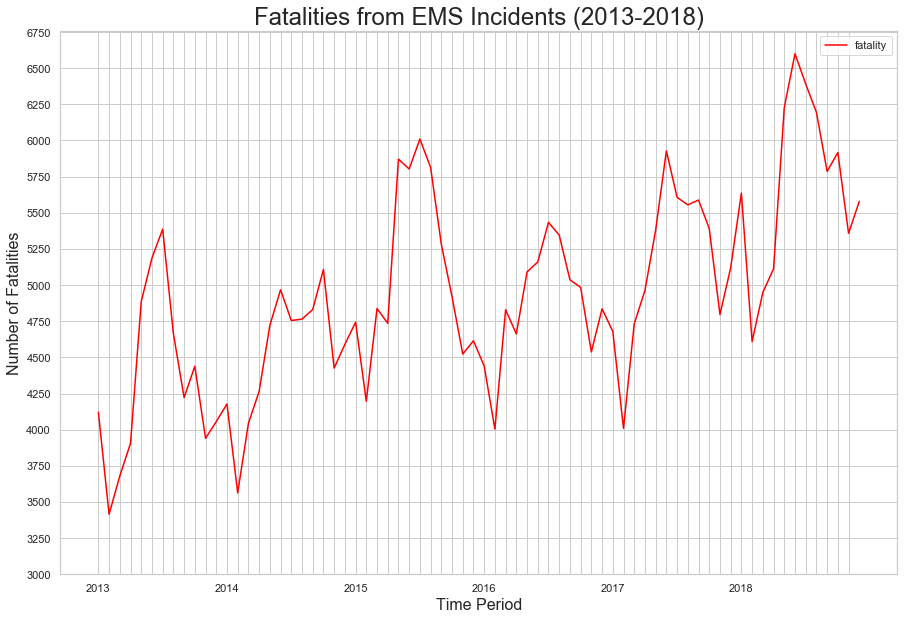

In [12]:
# Format xticks
x_start = death_plot.index[0].to_timestamp()
x_end = death_plot.index[-1].to_timestamp()
date_rng = pd.date_range(x_start,x_end,freq='M')

# Create plot, title, and axes labels
ax1 = death_plot.plot(figsize=(15,10),color='red')
ax1.set_title('Fatalities from EMS Incidents (2013-2018)',size=24)
ax1.set_xlabel('Time Period',size=16)
ax1.set_xticks([dtz.strftime('%Y-%m') for dtz in date_rng])
ax1.set_ylabel('Number of Fatalities',size=16)
ax1.set_yticks([3000 + 250*i for i in range(16)])

plt.savefig('data/CP1-02_EDA_fatalities_timeseries.png') # Export plot to PNG file
plt.show()

The time series above illustrates an upward trend in the annual number of fatalities that result from EMS incidents across the six-year observation period (2013 through 2018). In addition, the frequency of fatalities tend to spike during the middle of each year. This observation warrants a closer inspection to determine whether or not the incident month is a deterministic factor of a fatality.

### Fatalities: Distribution by Month (2013 - 2018)

In the previous time series plot, there are noticeable spikes in fatalities during the summer months. A closer examination will help to determine if this trend is consistent from year to year.

In [13]:
# Subset all fatalities by incident month
deaths_by_month = fatalities.loc[:,['incident_month','fatality']].groupby(['incident_month']).sum()
#deaths_by_month

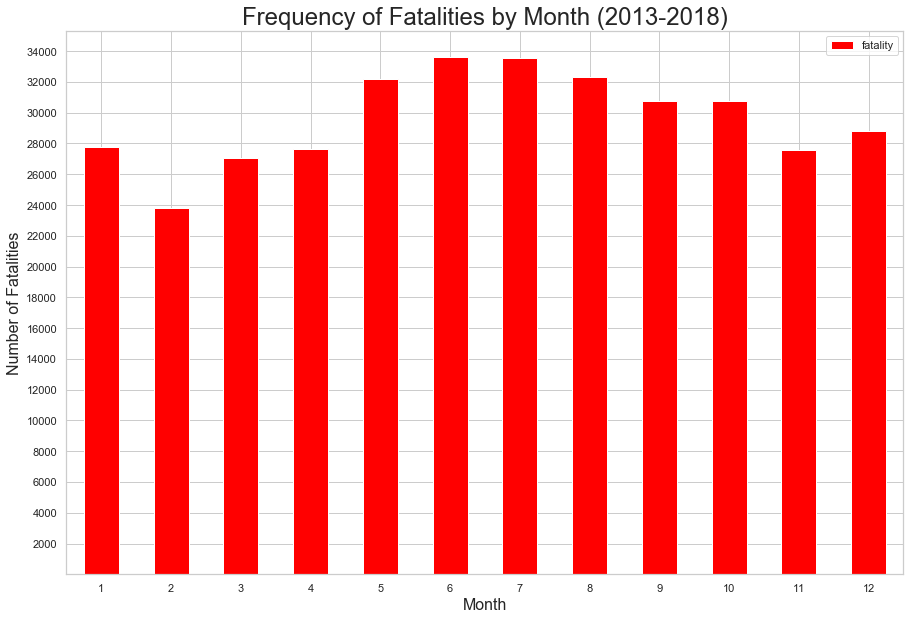

In [14]:
# Create plot, title, and axes labels
ax2 = deaths_by_month.plot(kind='bar',figsize=(15,10),color='red')
ax2.set_title('Frequency of Fatalities by Month (2013-2018)',size=24)
ax2.set_xlabel('Month',size=16)
ax2.set_xticklabels([i for i in range(1,13)],rotation=0)
ax2.set_ylabel('Number of Fatalities',size=16)
ax2.set_yticks([2000*i for i in range(1,18)])

#plt.savefig('data/CP1-02_EDA_fatalities_months.png') # Export plot to PNG file
plt.show()

In [ ]:
# Create list of years spanned by dataset
years = list(deaths.incident_datetime.dt.year.unique())

# Create tuples for start and end month for each year
death_period = []
for year in years:
    start = str(year)+'-01'
    end = str(year)+'-12'
    period = (start,end)
    death_period.append(period)

# Create 'death_plot' subsets for each year
dplot_arr = []
for s,e in death_period:
    s = pd.to_datetime(s)
    e = pd.to_datetime(e)
    temp_df = death_plot.loc[str(s):str(e),:]
    dplot_arr.append(temp_df)

# Create 'death_plot' plots for each year
for i in range(len(dplot_arr)):
    ax = dplot_arr[i].plot(color='red')
    ax.set_title('Fatalities from EMS Incidents ({})'.format(dplot_arr[i].index[0].year),size=16)
    ax.set_xlabel('Time Period',size=16)
    ax.set_ylabel('Number of Fatalities',size=16)

The plots above show that the highest monthly frequency of fatalites during the six-year observation period (2013 through 2018) generally occur in June, July, and August. This suggests that the month in which an EMS incident takes place may have an impact on whether or not a fatality will occur.

### Fatalities: Frequency by Borough (2013-2018)

What is the frequency of fatalities within each borough of the City of New York?

In [15]:
# Frequency of Fatalities by Borough (2013-2018)
deaths_by_borough = df[(df.fatality==True) & (df.borough!='UNKNOWN')].borough.value_counts().head()
deaths_by_borough

MANHATTAN                   111841
BROOKLYN                     95824
BRONX                        75176
QUEENS                       61321
RICHMOND / STATEN ISLAND     11775
Name: borough, dtype: int64

In [16]:
# Total Percentage of Fatalities by Borough (2013-2018)
df[(df.fatality==True) & (df.borough!='UNKNOWN')].borough.value_counts(normalize=True).head()

MANHATTAN                   0.314216
BROOKLYN                    0.269216
BRONX                       0.211206
QUEENS                      0.172280
RICHMOND / STATEN ISLAND    0.033082
Name: borough, dtype: float64

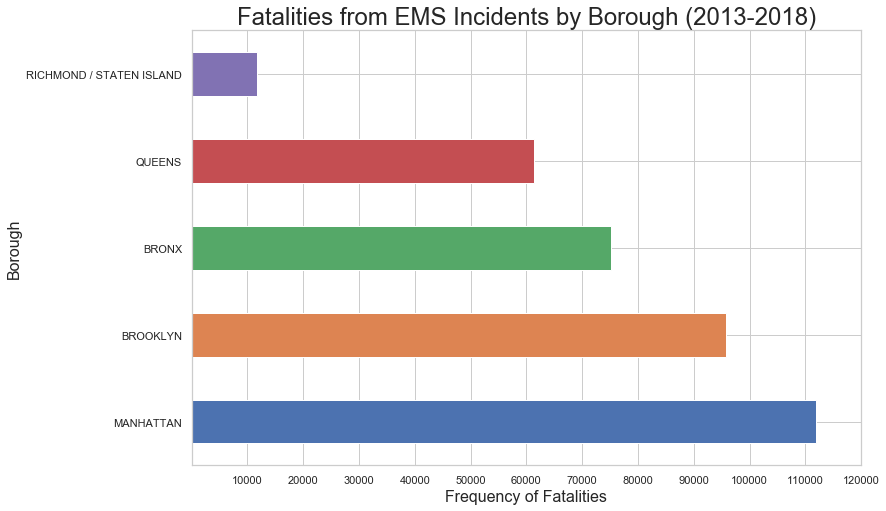

In [17]:
# Create plot, title, and axes labels
ax3 = deaths_by_borough.plot(kind='barh',figsize=(12,8))
ax3.set_title('Fatalities from EMS Incidents by Borough (2013-2018)',size=24)
ax3.set_xlabel('Frequency of Fatalities',size=16)
ax3.set_xticks([10000*i for i in range(1,13)])
ax3.set_ylabel('Borough',size=16)

#plt.savefig('data/CP1-02_EDA_fatalities_boroughs.png') # Export plot to PNG file
plt.show()

The bar chart shows that the highest portion of fatalities that result from EMS incidents (31.42%) occur in Manhattan. This an interesting observation given that the populations of Brooklyn and Queens, respectively, are historically greater than the population of Manhattan.

*Source: U.S. Census Bureau, Population Division, 
        Annual Estimates of the Resident Population: April 1, 2010 to July 1, 2018*

### Initial Severity Level vs. Final Severity Level

To what extent does the incident assessment determined from caller-provided information (initial_severity_level_code) correlate with the assessment made by response personnel on-the-scene (final_severity_level_code)?

In [18]:
# Subset all fatalities by initial and final severity level code
severity_levels = fatalities.loc[:,['initial_severity_level_code',\
                                    'final_severity_level_code']]
#severity_levels.head()

In [19]:
# Determine correlation between 'initial_severity_level_code' and 'final_severity_level_code'
x=np.array(severity_levels['initial_severity_level_code'])
y=np.array(severity_levels['final_severity_level_code'])

np.corrcoef(x,y)

array([[1.        , 0.95168734],
       [0.95168734, 1.        ]])

There is a strong, linear correlation between the initial_severity_level_code and the final_severity_level_code. This indicates that the determination for the severity of an incident made by dispatch--based on the information obtained by a caller--aligns closely to the determination made by on-scene EMS crew.

For this reason, the initial_severity_level_code will be omitted from any analyses used to develop ML algorithms given that it is a redundant predictor variable.

### Fatalities: Incident Response Time vs. Final Severity Level

In [20]:
# Subset all fatalities by final severity level code and incident response time
response_vs_severity_lvl = fatalities.loc[:,['final_severity_level_code',\
                                         'incident_response_seconds_qy']]
response_vs_severity_lvl.head()

,final_severity_level_code,incident_response_seconds_qy
2,1,429.0
35,4,1126.0
36,5,1024.0
53,2,292.0
60,4,4329.0


In [21]:
# Create boxplot
#fig4,ax4 = plt.subplots(figsize=(15,15))
#sns.boxplot(x='final_severity_level_code',
#            y='incident_response_seconds_qy',
#            data=response_vs_severity_lvl)#,hue='final_severity_level_code')
#ax4.set_title('Incident Response Time by Severity Level',size=24)
#ax4.set_xlabel('Final Severity Level Code',size=16)
#ax4.set_ylabel('Incident Response Time (seconds)',size=16)
#plt.show()

In [22]:
# Create violinplot
#ax5 = sns.catplot(x='incident_response_seconds_qy',
#                y='final_severity_level_code',
#                hue='fatality',
#                row='final_severity_level_code',
#                data=df,
#                orient='h',
#                kind='violin',
#                split=True)
#plt.show()

In [23]:
# Create boxplot
#fig5,ax5 = plt.subplots(figsize=(15,15))
#sns.violinplot(x='final_severity_level_code',
#            y='incident_response_seconds_qy',
#            data=response_vs_severity_lvl,
#              hue='final_severity_level_code')
#plt.show()

### Fatalities: Frequency by Final Call Type (2013-2018)

Which final call types for EMS incidents result in the greatest number of fatalities?

In [24]:
# Frequency of Top-5 Call Types that Result in Death (2013-2018)
deaths_by_call_type = fatalities.final_call_type.value_counts().head()
deaths_by_call_type

EDP       57021
ARREST    53317
DRUG      46108
INJURY    43858
UNC       33552
Name: final_call_type, dtype: int64

In [25]:
# Proportion of Top-5 Call Types that Result in Death (2013-2018)
fatalities.final_call_type.value_counts(normalize=True).head()

EDP       0.160199
ARREST    0.149793
DRUG      0.129539
INJURY    0.123218
UNC       0.094263
Name: final_call_type, dtype: float64

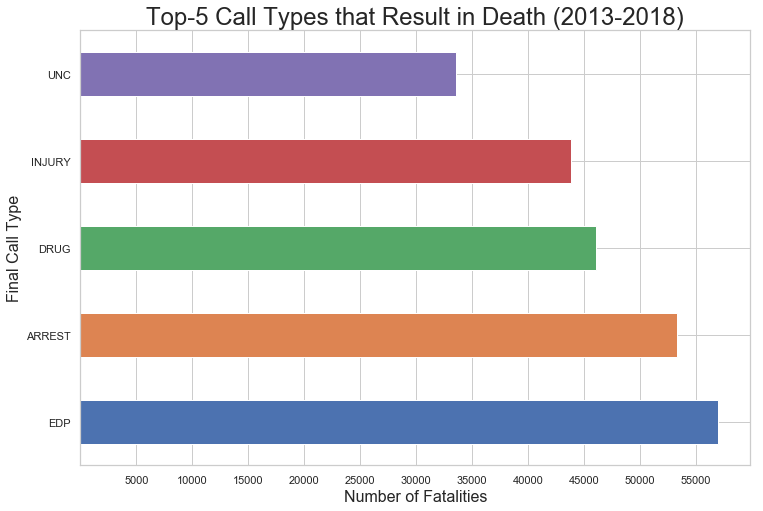

In [26]:
# Create plot, title, and axes labels
ax6 = deaths_by_call_type.plot(kind='barh',figsize=(12,8))
ax6.set_title('Top-5 Call Types that Result in Death (2013-2018)',size=24)
ax6.set_xlabel('Number of Fatalities',size=16)
ax6.set_xticks([5000*i for i in range(1,12)])
ax6.set_ylabel('Final Call Type',size=16)

#plt.savefig('data/CP1-02_EDA_fatalities_call_type.png') # Export plot to PNG file
plt.show()

###### Call Type Descriptions
+ UNC = Unconscious Patient
+ INJURY = Non-Critical Injury
+ DRUG = HX Drug or Alcohol Abuse
+ ARREST = Cardiac Arrest
+ EDP = Psychiatric Patient